# <span style='background-color:#fff5b1'>최적화 (Optimize)
- 모델이 예측한 결과와 정답간의 <span style='background-color:#fff5b1'>**차이(오차)**</span>를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- <span style='background-color:#fff5b1'>**모델의 예측값과 실제 값의 차이**</span>를 계산하는 함수를 만들고 그 값이<span style='background-color:#fff5b1'> **최소가 되는 지점**</span>을 찾는 작업을 한다.

## 최적화 문제
- 함수 <span style='background-color:#fff5b1'>f(w) 의 값을 최소화(또는 최대화) 하는 변수 w(파라미터)</span>를 찾는 것.
$$
w_{i} = \arg \min_w f(w) 
$$

> - 오차를 최소화하는 W

### <span style='background-color:#fff5b1'>손실함수(Loss Function), 비용함수(Cost Function)</span>, 목적함수(Object Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - <span style='background-color:#fff5b1'>**Classification(분류)**</span>의 경우<span style='background-color:#fff5b1'> **cross entropy**</span>를 사용한다.
    - <span style='background-color:#fff5b1'>**Regression(회귀)**</span>의 경우<span style='background-color:#fff5b1'> **MSE(Mean Squared Error)**</span>를 사용한다.

## 최적화 문제를 해결하는 방법
- <span style='background-color:#fff5b1'>**Loss 함수 최적화 함수를 찾는다.**</span>
    - Loss를 최소화하는 weight들을 찾는 함수(공식)을 찾는다.
    - Feature와 sample 수가 많아 질 수록 계산량이 급증한다.
    - 최적화 함수가 없는 Loss함수도 있다.
    
- <span style='background-color:#fff5b1'>**경사하강법 (Gradient Descent)**</span>
    - 값을 조금씩 조금씩 조정해나가면서 최소값을 찾는다.

## <span style='background-color:#fff5b1'>경사하강법 (Gradient Descent)</span>
> - **머신러닝 / 딥러닝에서 굉장히 많이 사용한다.**
- 다양한 종류의 문제에서 최적의 해법을 찾을 수 있는 <span style='background-color:#fff5b1'>**일반적인 최적화 알고리즘**</span>
- 손실함수를 최소화하는 파라미터를 찾기위해 <span style='background-color:#fff5b1'>**반복해서 조정해 나간다.**</span> 
    - 파라미터 벡터 $W$에 대해 손실함수의 현재 <span style='background-color:#fff5b1'>**gradient(경사,기울기) = '미분'**</span>를 계산한다.
    - gradient가 감소하는 방향으로 벡터 $W$를 조정한다.
    - gradient가 0이 될때 까지 반복한다.
- gradient가 <span style='background-color:#fff5b1'>**양수이면**</span> loss와 weight가 <span style='background-color:#fff5b1'>**비례관계란**</span> 의미이므로 loss를 더 작게 하려면 <span style='background-color:#fff5b1'>**weight가 작아져야 한다.** </span>   
- gradient가 <span style='background-color:#fff5b1'>**음수이면**</span> loss와 weight가 <span style='background-color:#fff5b1'>**반비례관계란**</span> 의미이므로 loss를 더 작게 하려면 <span style='background-color:#fff5b1'>**weight가 커져야 한다.**</span> 


> - 미분은 변화율을 보는것이다.
- X가 커지니 W(오차)

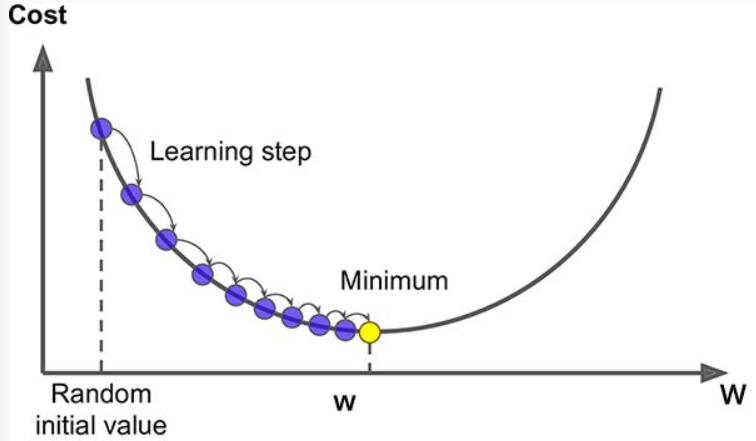

### 파라미터 조정

$$
W_{new} = W-\alpha\frac{\partial}{\partial {W}}cost(W)
$$


<center>$W$: 파라미터<br>$\alpha$:학습률 (0 ~ 1)<br></center> 

- 학습률 (Learning rate)
    - 기울기에 따라 이동할 step의 크기. 경사하강법 알고리즘에서 지정해야하는 하이퍼 파라미터이다.
    - 학습률을 너무 작게 잡으면 최소값에 수렴하기 위해 많은 반복을 진행해야해 시간이 오래걸린다.
    - 학습률을 너무 크게 잡으면 왔다 갔다 하다가 오히려 더 큰 값으로 발산하여 최소값에 수렴하지 못하게 된다.

In [37]:
def loss(weight):
    return (weight-1)**2 + 2

In [2]:
#  위의 loss함수의 도함수
def derived_loss(weight):
    return 2*(weight-1)

In [57]:
print('w = 1, 오차:', loss(1))
print('w = 1, 기울기:',derived_loss(1))

w = 1, 오차: 2
w = 1, 기울기: 0


In [6]:
loss(5), derived_loss(5)

(18, 8)

In [18]:
weight = 5
lr = 0.1    # 학습율 (learning rate)
new_weight = weight - lr*derived_loss(weight)
new_weight

4.2

##### 반복문을 이용해 gradient가 0이 되는 지점의 weight 찾기

In [29]:
import numpy as np
np.random.seed(0)

learning_rate = 0.4
# learning_rate = 0.001
# learning_rate = 10

max_iter = 100                    # 최적의 weight를 찾기위한 최대 반복횟수

weight =  np.random.randint(-2,3) # 첫번째(시작) weight => random하게 잡는다.
weight_list = [weight]            # 새로 계산된 weight들을 저장할 리스트
iter_cnt = 0                      # 반복횟수를 저장할 변수

while True:
    # loss함수에 대한 미분값을 구해서 0이면 반복을 멈춘다.
    if derived_loss(weight) == 0:
        break
    if iter_cnt == max_iter:      # 현재 반복이 max_iter라면 멈춘다.
        break
    # 새로운 weight값을 계산
    weight = weight - learning_rate * derived_loss(weight)
    weight_list.append(weight) 
    iter_cnt += 1

In [30]:
iter_cnt

23

In [31]:
weight_list

[2,
 1.2,
 1.04,
 1.008,
 1.0016,
 1.00032,
 1.000064,
 1.0000128,
 1.00000256,
 1.000000512,
 1.0000001024,
 1.00000002048,
 1.000000004096,
 1.0000000008192,
 1.00000000016384,
 1.000000000032768,
 1.0000000000065536,
 1.0000000000013107,
 1.0000000000002622,
 1.0000000000000524,
 1.0000000000000104,
 1.000000000000002,
 1.0000000000000004,
 1.0]

In [22]:
loss(0.9), loss(1.0), loss(1.1)

(2.01, 2.0, 2.0100000000000002)